In [10]:
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
img = Image.open('130Gyarados_Dream.png')
img = img.convert("RGBA")
datas = img.getdata()
newData = []
for item in datas:
    if item[3] == 0:
        newData.append((255, 255, 255, 255))
    else:
        newData.append(item)

img.putdata(newData)
img = img.convert("RGB")
img.save('arquivo.jpg')

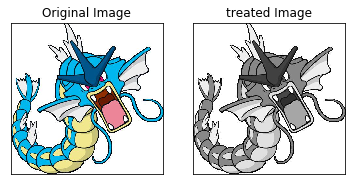

In [12]:
GAUSSIAN_KERNEL_SIZE = 3
GAUSSIAN_SIGMA = 0

DEFAULT_CANNY_SIGMA = 0.33
DEFAULT_IMAGES_TO_CHOOSE = 5

LOWER_SIGMA_THRESHOLD = 10
UPPER_SIGMA_THRESHOLD = 80

MAXIMUM_IMAGE_SIZE = 1920

arquivo = 'arquivo.jpg'

img = cv2.imread(arquivo, -1)

try:
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
except:
    pass

img2 = cv2.imread(arquivo, 0)

plt.subplot(121),plt.imshow(img, cmap = 'gray');
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, cmap = 'gray')
plt.title('treated Image'), plt.xticks([]), plt.yticks([])
plt.show()

True

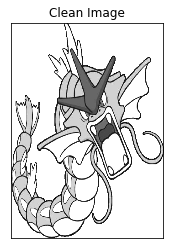

In [13]:
(thresh, im_bw) = cv2.threshold(img2, 0, 255, 10)
im_bw = cv2.resize(im_bw,(595, 842))
plt.subplot(121),plt.imshow(im_bw, cmap = 'gray');
plt.title('Clean Image'), plt.xticks([]), plt.yticks([])
cv2.imwrite('binary_image.bmp', im_bw)

In [5]:
!potrace -s binary_image.bmp -o teste.svg

In [34]:
import re
file = open('teste.svg', 'r')
paths = re.findall(r"<path [^>]*>", file.read())

In [96]:
newpaths = []
for path in paths:
    path_aux = path.replace('\n', ' ').replace('<path d="', '').replace('"/>', '')
    newpaths.append(path_aux)

final_path = []
for path in newpaths:
    path_aux = re.findall(r'([MmCcSsLl][^MmCcSsLl]*)', path)
    subpath = []
    for command in path_aux:
        first_letter = command[0]
        last_letter = command[-1]
        command_aux = command.replace(first_letter, first_letter + ' ')
        if last_letter != ' ':
            command_aux = command_aux.replace(last_letter, ' ' + last_letter)
        command_aux = command_aux.strip()
        command_aux = command_aux.split(' ')
        subpath.append(command_aux)
    final_path.append(subpath)

In [97]:
final_path

[[['M', '2060', '8376'],
  ['c',
   '0',
   '-46',
   '26',
   '-180',
   '39',
   '-206',
   '5',
   '-9',
   '16',
   '-85',
   '25',
   '-170',
   '10',
   '-85',
   '22',
   '-164',
   '26',
   '-175',
   '5',
   '-11',
   '16',
   '-109',
   '24',
   '-217',
   '8',
   '-109',
   '17',
   '-202',
   '20',
   '-206',
   '3',
   '-5',
   '2',
   '-21',
   '-2',
   '-36'],
  ['l', '-7', '-27', '-24', '20'],
  ['c',
   '-13',
   '12',
   '-30',
   '21',
   '-37',
   '21',
   '-7',
   '0',
   '-16',
   '9',
   '-19',
   '20',
   '-9',
   '29',
   '-70',
   '28',
   '-96',
   '-2',
   '-24',
   '-29',
   '-23',
   '-39',
   '1',
   '-83',
   '11',
   '-20',
   '20',
   '-40',
   '20',
   '-46',
   '0',
   '-10',
   '24',
   '-66',
   '71',
   '-165',
   '10',
   '-23',
   '19',
   '-46',
   '19',
   '-52',
   '0',
   '-6',
   '8',
   '-26',
   '18',
   '-44',
   '10',
   '-18',
   '24',
   '-53',
   '31',
   '-77',
   '7',
   '-25',
   '21',
   '-61',
   '32',
   '-80',
   '10',
   '-20

In [24]:
!inkscape teste.svg -E output.eps

In [ ]:
GAUSSIAN_KERNEL_SIZE = 3
GAUSSIAN_SIGMA = 0

DEFAULT_CANNY_SIGMA = 0.33
DEFAULT_IMAGES_TO_CHOOSE = 5

LOWER_SIGMA_THRESHOLD = 10
UPPER_SIGMA_THRESHOLD = 80

MAXIMUM_IMAGE_SIZE = 1920

img = cv2.imread('pikachu.jpg', -1)
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])

grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(grayImage,
            (GAUSSIAN_KERNEL_SIZE, GAUSSIAN_KERNEL_SIZE),
            GAUSSIAN_SIGMA)

plt.subplot(121),plt.imshow(img, cmap = 'gray');
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurred, cmap = 'gray')
plt.title('treated Image'), plt.xticks([]), plt.yticks([])
plt.show()